In [222]:
import pandas as pd
import numpy as np

### **Exploratory data analysis**

Load and inspect the data

In [223]:
client_train = pd.read_csv("/content/client_train.csv")
client_test = pd.read_csv("/content/client_test.csv")
invoice_train = pd.read_csv("/content/invoice_train.csv")
invoice_test = pd.read_csv("/content/invoice_test.csv")

<ipython-input-223-ef4e5857097d>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv("/content/invoice_train.csv")


In [224]:
print("client_train first 5 rows\n",client_train.head())
print("invoice_train first 5 rows\n",invoice_train.head())

client_train first 5 rows
    disrict          client_id  client_catg  region creation_date  target
0       60     train_Client_0           11     101    31/12/1994     0.0
1       69     train_Client_1           11     107    29/05/2002     0.0
2       62    train_Client_10           11     301    13/03/1986     0.0
3       69   train_Client_100           11     105    11/07/1996     0.0
4       62  train_Client_1000           11     303    14/10/2014     0.0
invoice_train first 5 rows
         client_id invoice_date  tarif_type  counter_number counter_statue  \
0  train_Client_0   2014-03-24          11         1335667              0   
1  train_Client_0   2013-03-29          11         1335667              0   
2  train_Client_0   2015-03-23          11         1335667              0   
3  train_Client_0   2015-07-13          11         1335667              0   
4  train_Client_0   2016-11-17          11         1335667              0   

   counter_code  reading_remarque  counter_c

there is one common feature between these two datasets which is "client_id"

In [225]:
train = pd.merge(client_train, invoice_train, on='client_id', suffixes=('_client', '_invoice'))
test = pd.merge(client_test, invoice_test, on='client_id', suffixes=('_client', '_invoice'))


In [226]:
print(train.shape)
print(test.shape)

(4476749, 21)
(443637, 20)


train set has one more column than test set which is the target

In [227]:
train.dtypes

disrict                   int64
client_id                object
client_catg               int64
region                    int64
creation_date            object
target                  float64
invoice_date             object
tarif_type                int64
counter_number            int64
counter_statue           object
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type             object
dtype: object

In [228]:
train.describe()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,6.348246e+01,1.194381e+01,2.103584e+02,7.887688e-02,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,3.273403e+00,6.022452e+00,1.035828e+02,2.695465e-01,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


Data cleaning and preprocessing

In [229]:
print(train.count(),"\n")
print(test.count())

disrict                 4476749
client_id               4476749
client_catg             4476749
region                  4476749
creation_date           4476749
target                  4476749
invoice_date            4476749
tarif_type              4476749
counter_number          4476749
counter_statue          4476749
counter_code            4476749
reading_remarque        4476749
counter_coefficient     4476749
consommation_level_1    4476749
consommation_level_2    4476749
consommation_level_3    4476749
consommation_level_4    4476749
old_index               4476749
new_index               4476749
months_number           4476749
counter_type            4476749
dtype: int64 

disrict                 443637
client_id               443637
client_catg             443637
region                  443637
creation_date           443637
invoice_date            443637
tarif_type              443637
counter_number          443637
counter_statue          443637
counter_code            443637
rea

In [230]:
print(train.isnull().sum())
print(test.isnull().sum())

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64
disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        1
counter_coefficient     1
consommation_level_1    1
consommation_level_2    1
consommation_level_3    1
consommation_level_4    1
old_index               1

In [231]:
duplicate_rows = train[train.duplicated()]
len(duplicate_rows)

11

In [232]:
train.dtypes

disrict                   int64
client_id                object
client_catg               int64
region                    int64
creation_date            object
target                  float64
invoice_date             object
tarif_type                int64
counter_number            int64
counter_statue           object
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type             object
dtype: object

convert every column that has an object data type

In [233]:
train['creation_date'] = pd.to_datetime(train['creation_date'], format='%d/%m/%Y').astype(int)
train['invoice_date'] = pd.to_datetime(train['invoice_date'], format='%Y-%m-%d').astype(int)
test['creation_date'] = pd.to_datetime(test['creation_date'], format='%d/%m/%Y').astype(int)
test['invoice_date'] = pd.to_datetime(test['invoice_date'], format='%Y-%m-%d').astype(int)

In [234]:
train['client_id'] = train['client_id'].str.replace('train_Client_', '')
train['client_id'] = pd.to_numeric(train['client_id'])
test['client_id'] = test['client_id'].str.replace('test_Client_', '')
test['client_id'] = pd.to_numeric(test['client_id'])

In [235]:
train["counter_statue"] = pd.to_numeric(train["counter_statue"], errors='coerce')
test["counter_statue"] = pd.to_numeric(test["counter_statue"], errors='coerce')

In [236]:
train["counter_type"].value_counts()

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64

In [237]:
train = pd.get_dummies(train, columns = ['counter_type'])
test = pd.get_dummies(test, columns = ['counter_type'])

In [238]:
train['counter_type_ELEC'] = train['counter_type_ELEC'].astype('int32')
train['counter_type_GAZ'] = train['counter_type_GAZ'].astype('int32')

test['counter_type_ELEC'] = test['counter_type_ELEC'].astype('int32')
test['counter_type_GAZ'] = test['counter_type_GAZ'].astype('int32')

In [239]:
train.dtypes

disrict                   int64
client_id                 int64
client_catg               int64
region                    int64
creation_date             int64
target                  float64
invoice_date              int64
tarif_type                int64
counter_number            int64
counter_statue          float64
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type_ELEC         int32
counter_type_GAZ          int32
dtype: object

since its just a few value that is missing from some feature, we are going to drop it

In [240]:
train = train.dropna()
train.count()

disrict                 4476736
client_id               4476736
client_catg             4476736
region                  4476736
creation_date           4476736
target                  4476736
invoice_date            4476736
tarif_type              4476736
counter_number          4476736
counter_statue          4476736
counter_code            4476736
reading_remarque        4476736
counter_coefficient     4476736
consommation_level_1    4476736
consommation_level_2    4476736
consommation_level_3    4476736
consommation_level_4    4476736
old_index               4476736
new_index               4476736
months_number           4476736
counter_type_ELEC       4476736
counter_type_GAZ        4476736
dtype: int64

In [241]:
test = test.dropna()
test.count()

disrict                 443636
client_id               443636
client_catg             443636
region                  443636
creation_date           443636
invoice_date            443636
tarif_type              443636
counter_number          443636
counter_statue          443636
counter_code            443636
reading_remarque        443636
counter_coefficient     443636
consommation_level_1    443636
consommation_level_2    443636
consommation_level_3    443636
consommation_level_4    443636
old_index               443636
new_index               443636
months_number           443636
counter_type_ELEC       443636
counter_type_GAZ        443636
dtype: int64

finally, check on the shape again of each set to make sure everything is alright

In [242]:
print(train.shape)
print(test.shape)

(4476736, 22)
(443636, 21)


<Axes: >

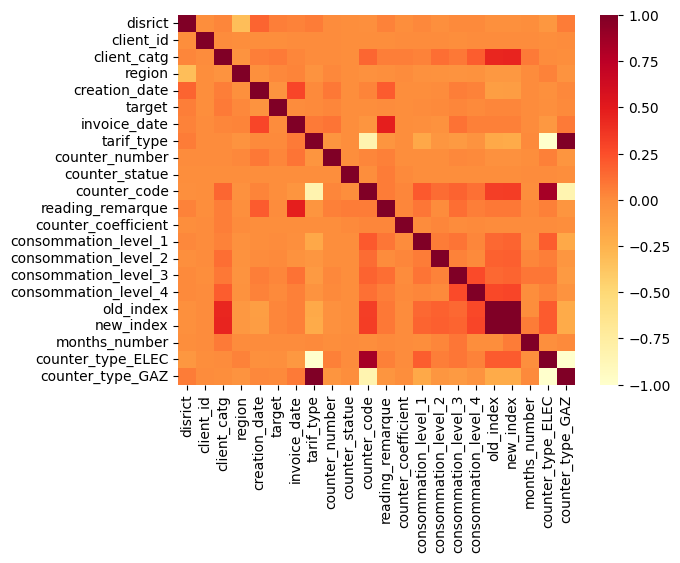

In [243]:
import seaborn as sns

corr_matrix = train.corr()

sns.heatmap(data=corr_matrix, cmap='YlOrRd')

Split the data

In [244]:
from sklearn.model_selection import train_test_split

y = train['target'].values
X = train.drop('target', axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train first model

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

Evaluate first model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

In [ ]:
score = model.score(x_test, y_test)
print('Model Score:', score)

Train second model

In [218]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)
print(y_pred2)

[0.03 0.03 0.   ... 0.   0.   0.  ]


Evaluate second model

In [219]:
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
mae2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)


print('MSE:', mse2)
print('RMSE:', rmse2)
print('MAE:', mae2)
print('R-squared:', r2_2)

MSE: 0.004879708113493301
RMSE: 0.06985490758345687
MAE: 0.020203864865951566
R-squared: 0.9328408191063756


In [220]:
score2 = model2.score(x_test, y_test)
print('Model Score:', score2)

Model Score: 0.9328408191063756


choosing the model with the best score

Apply the model to the new data

In [221]:
pred_testData = model2.predict(test)

client_id = test['client_id']

results = np.column_stack((client_id, pred_testData))

results_df = pd.DataFrame(results, columns=['Client ID', 'Predicted Value'])
results_df.to_csv('predictions.csv', index=False)
print(pred_testData)

[0.32 0.31 0.39 ... 0.   0.   0.  ]
